<a href="https://colab.research.google.com/github/AodhanGallagher/XAI-for-Diabetic-Retinopathy-Diagnosis/blob/main/Explainers/LIME_explainer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LIME Explanations for Image Classification**
This file is for the calculation and showing of LIME explanations / boundaries for individual images from each class of Diabetic Retinopathy to show how each feature of the image impacts the model's final classification.
\
\
Google Colab was used for the increased computation power needed to efficiently work on this project.

## Mounting Google Drive

In [1]:
# Importing and mounting my Google Drive account where the dataset is stored
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Initial Setup

### Imports

In [9]:
# Importing relevant libraries for showing LIME explanations in image classification
import pickle
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from lime import lime_image
from skimage.segmentation import mark_boundaries

### Getting Images + Setting Labels

In [4]:
# Code used to get an image from each class

# Setting file path
file_path = '/content/gdrive/MyDrive/Dissertation/final-year-project-AodhanGallagher/Datasets/ProcessedAPTOS/train_images/'

# Getting a class 0 image (No Diabetic Retinopathy)
image_0_path = file_path + '08b6e3240858.png'
image_0 = plt.imread(image_0_path)

# Getting a class 1 image (Mild Diabetic Retinopathy)
image_1_path = file_path + '358d2224de73.png'
image_1 = plt.imread(image_1_path)

# Getting a class 2 image (Moderate Diabetic Retinopathy)
image_2_path = file_path + 'b498b84d383f.png'
image_2 = plt.imread(image_2_path)

# Getting a class 3 image (Severe Diabetic Retinopathy)
image_3_path = file_path + '1ab3f1c71a5f.png'
image_3 = plt.imread(image_3_path)

# Getting a class 4 image (Proliferative Diabetic Retinopathy)
image_4_path = file_path + 'ebe0175e530c.png'
image_4 = plt.imread(image_4_path)

predict_labels = {
    0: '0 - No Diabetic Retinopathy',
    1: '1 - Mild Diabetic Retinopathy',
    2: '2 - Moderate Diabetic Retinopathy',
    3: '3 - Severe Diabetic Retinopathy',
    4: '4 - Proliferative Diabetic Retinopathy',
}

### Loading Model

In [5]:
# Loading in the fine-tuned ResNet-50 model
model = tf.keras.models.load_model('/content/gdrive/MyDrive/Dissertation/final-year-project-AodhanGallagher/ModelTraining/Models/diabetic_retinopathy_classifier.keras')

### Predict Function (For Use In Lime Explainer)

In [6]:
# Defining function to return the model's predictions on a passed in image
# This is necessary for LIME functions to work appropriately
def predict_fn(image):
    return model.predict(image)

## Calculating and Showing LIME Explanations

### Class 0 Image (No Diabetic Retinopathy)

In [35]:
# Configuring the image to make predictions on it
img_array = np.array(image_0)
img_array = np.expand_dims(img_array, axis=0)

# Predicting the image class
predictions = model.predict(img_array)

# Getting the highest weighted class (final classification) and assigning it the corresponding label
predicted_class_index = np.argmax(predictions)
predicted_class_label = predict_labels[predicted_class_index]

# Printing the predicted class
print("Predicted Class:", predicted_class_label)

1/1 [==============================] - 0s 25ms/step
Predicted Class: 0 - No Diabetic Retinopathy


In [ ]:
# Creating a LIME explainer instance
explainer = lime_image.LimeImageExplainer()

# Generating LIME explanations for the model's classification of the image
explanation = explainer.explain_instance(image_0, predict_fn, top_labels=5, hide_color=0, num_samples=5000)

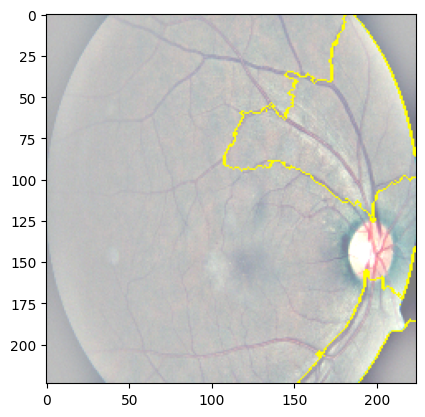

In [45]:
# Generating a visualisation for the LIME explanations and showing it overlaid on the original image
vis, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(vis / 2 + 0.5, mask))

### Class 1 Image (Mild Diabetic Retinopathy)

In [46]:
# Configuring the image to make predictions on it
img_array = np.array(image_1)
img_array = np.expand_dims(img_array, axis=0)

# Predicting the image class
predictions = model.predict(img_array)

# Getting the highest weighted class (final classification) and assigning it the corresponding label
predicted_class_index = np.argmax(predictions)
predicted_class_label = predict_labels[predicted_class_index]

# Printing the predicted class
print("Predicted Class:", predicted_class_label)

1/1 [==============================] - 0s 26ms/step
Predicted Class: 1 - Mild Diabetic Retinopathy


In [ ]:
# Creating a LIME explainer instance
explainer = lime_image.LimeImageExplainer()

# Generating LIME explanations for the model's classification of the image
explanation = explainer.explain_instance(image_1, predict_fn, top_labels=5, hide_color=0, num_samples=5000)

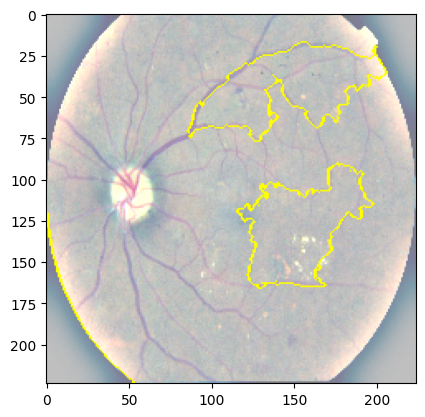

In [64]:
# Generating a visualisation for the LIME explanations and showing it overlaid on the original image
vis, mask = explanation.get_image_and_mask(explanation.top_labels[1], positive_only=True, num_features=6, hide_rest=False)
plt.imshow(mark_boundaries(vis / 2 + 0.5, mask))

### Class 2 Image (Moderate Diabetic Retinopathy)

In [65]:
# Configuring the image to make predictions on it
img_array = np.array(image_2)
img_array = np.expand_dims(img_array, axis=0)

# Predicting the image class
predictions = model.predict(img_array)

# Getting the highest weighted class (final classification) and assigning it the corresponding label
predicted_class_index = np.argmax(predictions)
predicted_class_label = predict_labels[predicted_class_index]

# Printing the predicted class
print("Predicted Class:", predicted_class_label)

1/1 [==============================] - 0s 25ms/step
Predicted Class: 2 - Moderate Diabetic Retinopathy


In [ ]:
# Creating a LIME explainer instance
explainer = lime_image.LimeImageExplainer()

# Generating LIME explanations for the model's classification of the image
explanation = explainer.explain_instance(image_2, predict_fn, top_labels=5, hide_color=0, num_samples=5000)

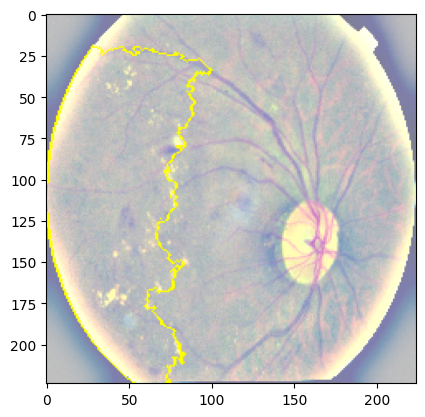

In [74]:
# Generating a visualisation for the LIME explanations and showing it overlaid on the original image
vis, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=7, hide_rest=False)
plt.imshow(mark_boundaries(vis / 2 + 0.5, mask))

### Class 3 Image (Severe Diabetic Retinopathy)

In [75]:
# Configuring the image to make predictions on it
img_array = np.array(image_3)
img_array = np.expand_dims(img_array, axis=0)

# Predicting the image class
predictions = model.predict(img_array)

# Getting the highest weighted class (final classification) and assigning it the corresponding label
predicted_class_index = np.argmax(predictions)
predicted_class_label = predict_labels[predicted_class_index]

# Printing the predicted class
print("Predicted Class:", predicted_class_label)

1/1 [==============================] - 0s 25ms/step
Predicted Class: 3 - Severe Diabetic Retinopathy


In [ ]:
# Creating a LIME explainer instance
explainer = lime_image.LimeImageExplainer()

# Generating LIME explanations for the model's classification of the image
explanation = explainer.explain_instance(image_3, predict_fn, top_labels=5, hide_color=0, num_samples=5000)

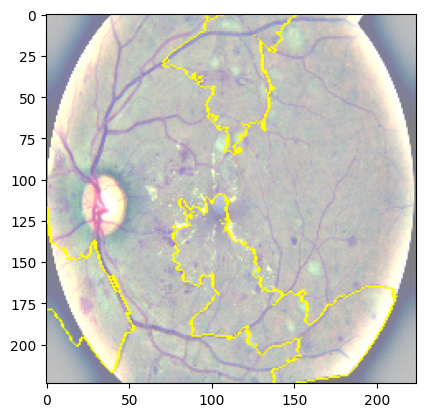

In [92]:
# Generating a visualisation for the LIME explanations and showing it overlaid on the original image
vis, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(vis / 2 + 0.5, mask))

### Class 4 Image (Proliferative Diabetic Retinopathy)

In [93]:
# Configuring the image to make predictions on it
img_array = np.array(image_4)
img_array = np.expand_dims(img_array, axis=0)

# Predicting the image class
predictions = model.predict(img_array)

# Getting the highest weighted class (final classification) and assigning it the corresponding label
predicted_class_index = np.argmax(predictions)
predicted_class_label = predict_labels[predicted_class_index]

# Printing the predicted class
print("Predicted Class:", predicted_class_label)

1/1 [==============================] - 0s 25ms/step
Predicted Class: 4 - Proliferative Diabetic Retinopathy


In [ ]:
# Creating a LIME explainer instance
explainer = lime_image.LimeImageExplainer()

# Generating LIME explanations for the model's classification of the image
explanation = explainer.explain_instance(image_4, predict_fn, top_labels=5, hide_color=0, num_samples=5000)

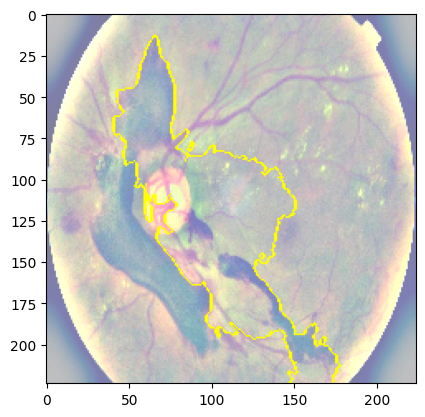

In [106]:
# Generating a visualisation for the LIME explanations and showing it overlaid on the original image
vis, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=4, hide_rest=False)
plt.imshow(mark_boundaries(vis / 2 + 0.5, mask))